<a href="https://colab.research.google.com/github/MennaKhaled17/CPP-UniPortal/blob/main/HealthCareTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/healthcare/students_train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape


(55500, 16)

In [ ]:
df.head()

,ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,1.0,Bobby JacksOn,30.0,Male,B-,Cancer,1/31/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328.0,Urgent,2/2/2024,Paracetamol,Normal
1,2.0,LesLie TErRy,62.0,Male,A+,Obesity,8/20/2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265.0,Emergency,8/26/2019,Ibuprofen,Inconclusive
2,3.0,DaNnY sMitH,76.0,Female,A-,Obesity,9/22/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205.0,Emergency,10/7/2022,Aspirin,Normal
3,4.0,andrEw waTtS,28.0,Female,O+,Diabetes,11/18/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450.0,Elective,12/18/2020,Ibuprofen,Abnormal
4,5.0,adrIENNE bEll,43.0,Female,AB+,Cancer,9/19/2022,Kathleen Hanna,White-White,Aetna,14238.31781,458.0,Urgent,10/9/2022,Penicillin,Abnormal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  50000 non-null  float64
 1   Name                50000 non-null  object 
 2   Age                 50000 non-null  float64
 3   Gender              50000 non-null  object 
 4   Blood Type          50000 non-null  object 
 5   Medical Condition   50000 non-null  object 
 6   Date of Admission   50000 non-null  object 
 7   Doctor              50000 non-null  object 
 8   Hospital            50000 non-null  object 
 9   Insurance Provider  50000 non-null  object 
 10  Billing Amount      50000 non-null  float64
 11  Room Number         50000 non-null  float64
 12  Admission Type      50000 non-null  object 
 13  Discharge Date      50000 non-null  object 
 14  Medication          50000 non-null  object 
 15  Test Results        50000 non-null  object 
dtypes: f

In [ ]:
for i in df.select_dtypes(include = "object").columns:
  print(df[i].value_counts())
  print("*"*40)

Name
DAvId muNoZ          2
PAUL SMith           2
DAniEl sMIth         2
TInA white           2
LOrI coOK            2
                    ..
NanCY DAughERtY      1
ryaN moss            1
MERcEdes garCIa      1
RebECCA VelAzQUEZ    1
dAnieLlE hARVEY      1
Name: count, Length: 49992, dtype: int64
****************************************
Gender
Female    25011
Male      24989
Name: count, dtype: int64
****************************************
Blood Type
AB+    6291
B+     6278
A-     6261
AB-    6259
A+     6246
O+     6235
B-     6230
O-     6200
Name: count, dtype: int64
****************************************
Medical Condition
Arthritis       8439
Diabetes        8384
Hypertension    8319
Cancer          8294
Obesity         8292
Asthma          8272
Name: count, dtype: int64
****************************************
Date of Admission
3/16/2024     45
8/10/2023     44
12/28/2021    43
8/24/2019     43
11/4/2019     43
              ..
5/28/2022     14
5/23/2022     13
2/6/2021      1

In [ ]:
# Set pandas to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Show number of missing values for all 16 features
print(df.isnull().sum())

ID                    5500
Name                  5500
Age                   5500
Gender                5500
Blood Type            5500
Medical Condition     5500
Date of Admission     5500
Doctor                5500
Hospital              5500
Insurance Provider    5500
Billing Amount        5500
Room Number           5500
Admission Type        5500
Discharge Date        5500
Medication            5500
Test Results          5500
dtype: int64


In [ ]:
# Drop rows where ALL values are null (entire row is empty)
df = df.dropna(how='all')

# Verify the new shape (should be 50,000 rows now)
print("New shape after dropping null rows:", df.shape)  # Expected: (50000, 16)

# Confirm no fully null rows remain
print("\nNull counts after cleaning:")
print(df.isnull().sum())

New shape after dropping null rows: (50000, 16)

Null counts after cleaning:
ID                    0
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [ ]:
(df.isnull().sum()/df.shape[0])*100

,0
ID,0.0
Name,0.0
Age,0.0
Gender,0.0
Blood Type,0.0
Medical Condition,0.0
Date of Admission,0.0
Doctor,0.0
Hospital,0.0
Insurance Provider,0.0


In [ ]:
df = df.drop(['ID'], axis=1)


In [ ]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [ ]:
missing_rows = df[df.isnull().any(axis=1)]
print("Rows with missing values:")
print(missing_rows)

Rows with missing values:
Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results]
Index: []


In [ ]:
print("Percentage of missing values per column:")
print((df.isnull().mean() * 100).round(2))

Percentage of missing values per column:
Name                  0.0
Age                   0.0
Gender                0.0
Blood Type            0.0
Medical Condition     0.0
Date of Admission     0.0
Doctor                0.0
Hospital              0.0
Insurance Provider    0.0
Billing Amount        0.0
Room Number           0.0
Admission Type        0.0
Discharge Date        0.0
Medication            0.0
Test Results          0.0
dtype: float64


In [ ]:
#  removing the Garabge data

from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/healthcare/students_train.csv')

# Identify columns with a high percentage of missing values
missing_percentage = df.isnull().sum() / len(df) * 100
columns_to_drop = missing_percentage[missing_percentage > 50].index  # Adjust threshold as needed

# Drop columns with excessive missing data
df = df.drop(columns=columns_to_drop)

#  imputation or removal
for col in df.select_dtypes(include=['number']):
    df[col] = df[col].fillna(df[col].median()) # Use median for numerical columns
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].fillna(df[col].mode()[0]) # Use mode for categorical columns


df = df.drop_duplicates()

df = df.dropna()

# Now the DataFrame should be cleaner
print(df.isnull().sum())
print(df.info())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ID                    0
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 50001 entries, 0 to 50000
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  50001 non-null  float64
 1   Name                50001 non-null  object 
 2   Age                 50001 non-null  float64
 3   Gender              50001 non-null  object 
 4   Blood Type          50001 non-null  object 
 5   Medical Condition   50

In [ ]:
# prompt: remove  any outliers in the data

import pandas as pd
from scipy import stats

# Assuming 'df' is your DataFrame

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Iterate through numerical columns and remove outliers using IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


print(df.shape) # Check the new shape of your DataFrame


(50001, 16)


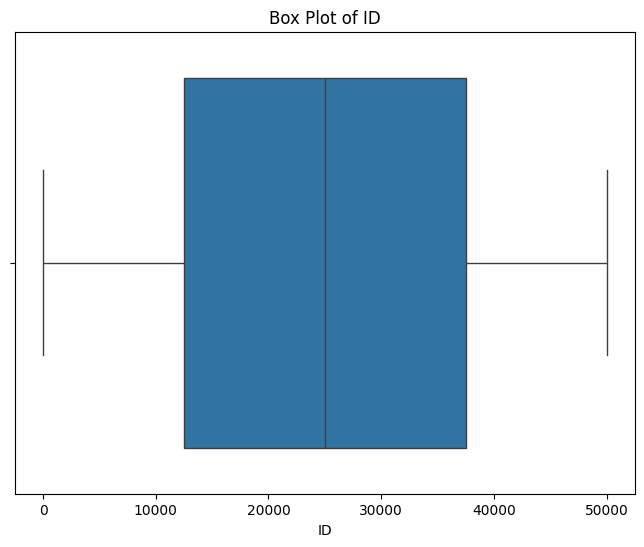

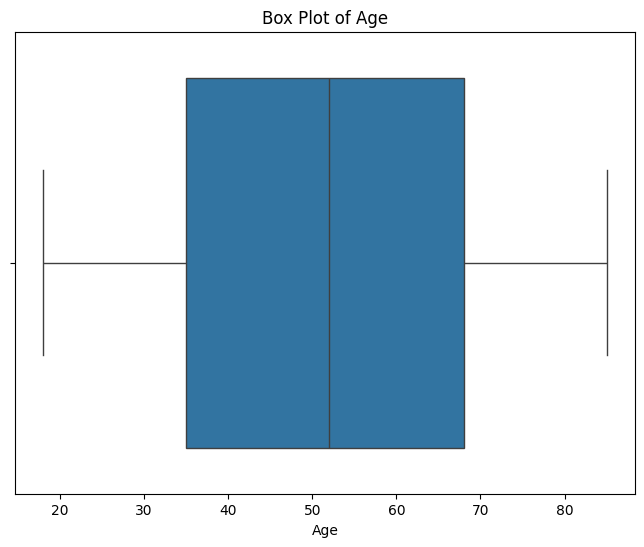

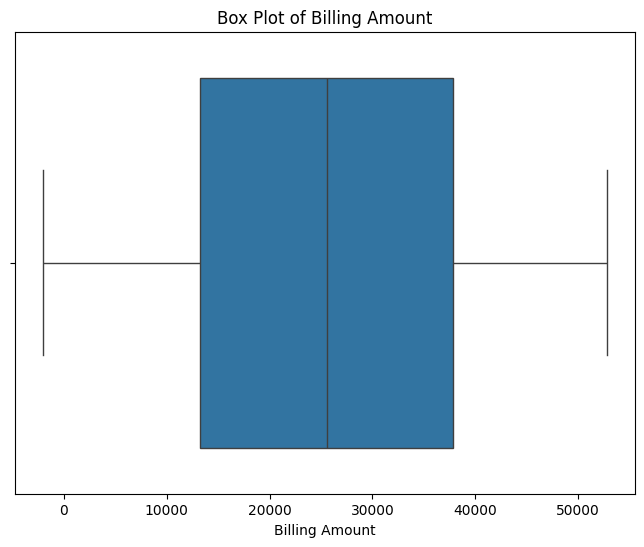

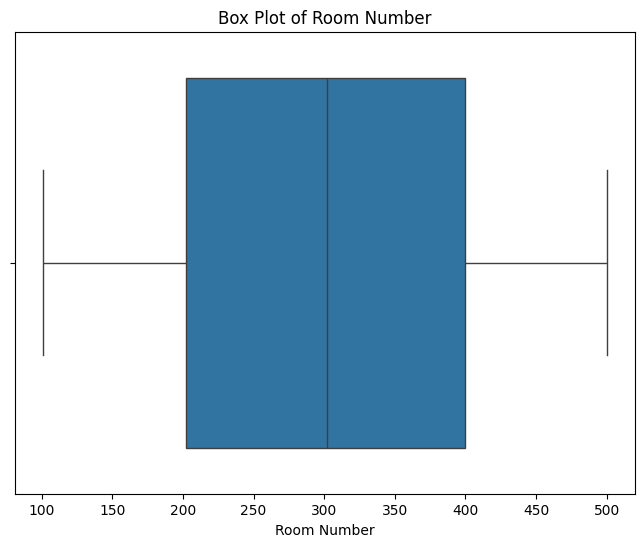

In [ ]:
# prompt: visiultion after seeing the data using box plot let the box plot in a right form

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'numerical_cols' is defined as before

# Iterate through numerical columns and create box plots
for col in numerical_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()


In [ ]:

print(df.head())
df.shape


    ID           Name   Age  Gender Blood Type Medical Condition  \
0  1.0  Bobby JacksOn  30.0    Male         B-            Cancer   
1  2.0   LesLie TErRy  62.0    Male         A+           Obesity   
2  3.0    DaNnY sMitH  76.0  Female         A-           Obesity   
3  4.0   andrEw waTtS  28.0  Female         O+          Diabetes   
4  5.0  adrIENNE bEll  43.0  Female        AB+            Cancer   

  Date of Admission            Doctor                    Hospital  \
0         1/31/2024     Matthew Smith             Sons and Miller   
1         8/20/2019   Samantha Davies                     Kim Inc   
2         9/22/2022  Tiffany Mitchell                    Cook PLC   
3        11/18/2020       Kevin Wells  Hernandez Rogers and Vang,   
4         9/19/2022    Kathleen Hanna                 White-White   

  Insurance Provider  Billing Amount  Room Number Admission Type  \
0         Blue Cross     18856.28131        328.0         Urgent   
1           Medicare     33643.32729    

(50001, 16)

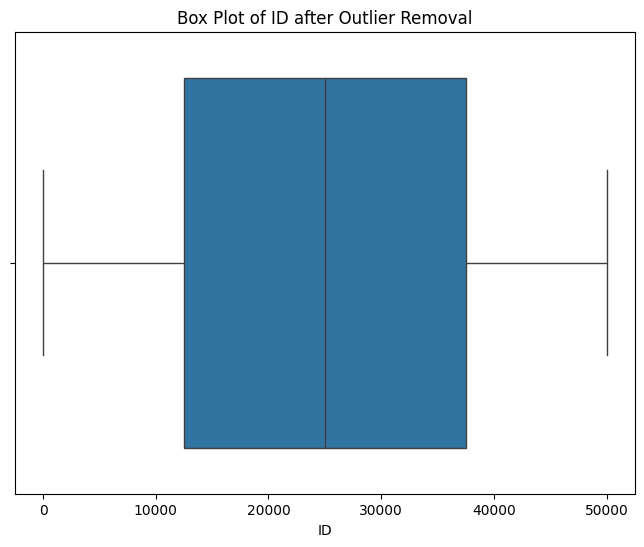

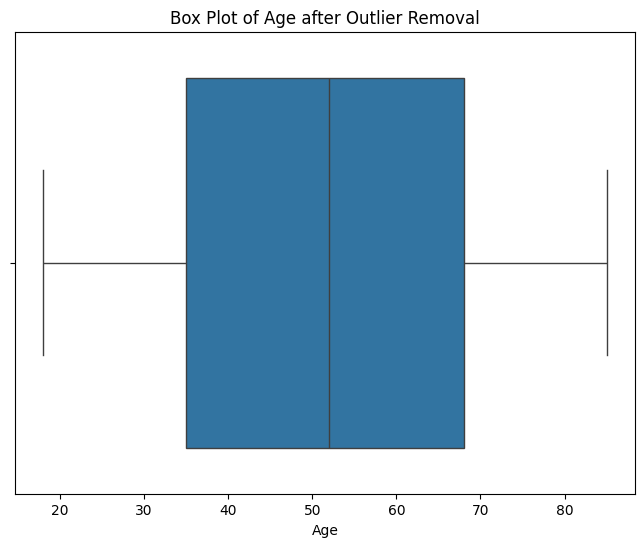

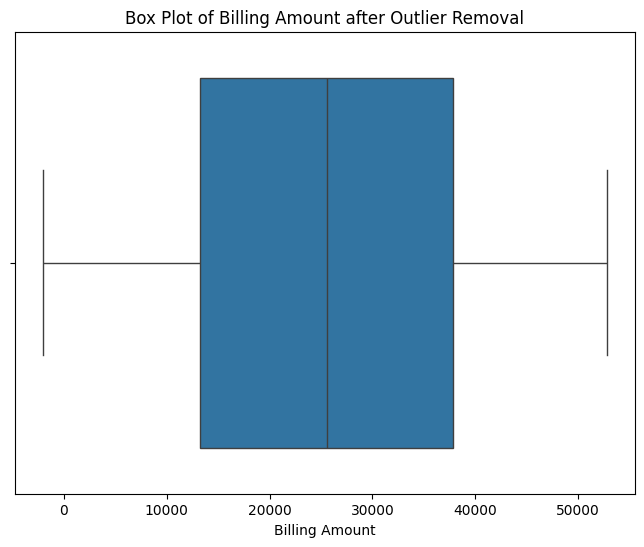

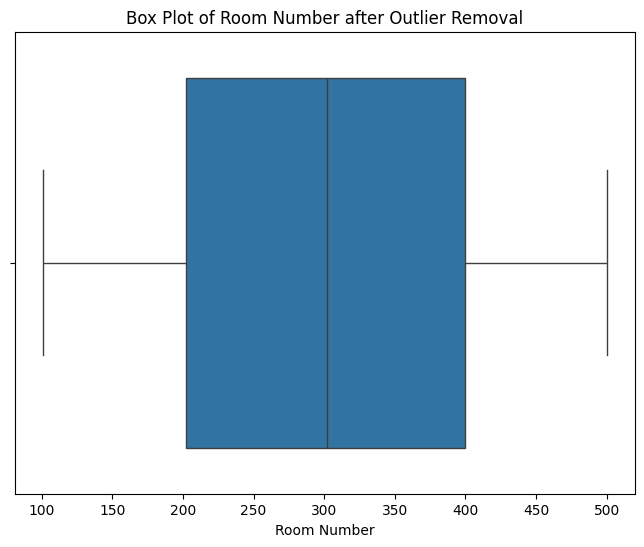

In [ ]:
# prompt: visiulise the data after removing the outliers using boxplot

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and outlier removal has already been performed.

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Create box plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col} after Outlier Removal')
    plt.show()


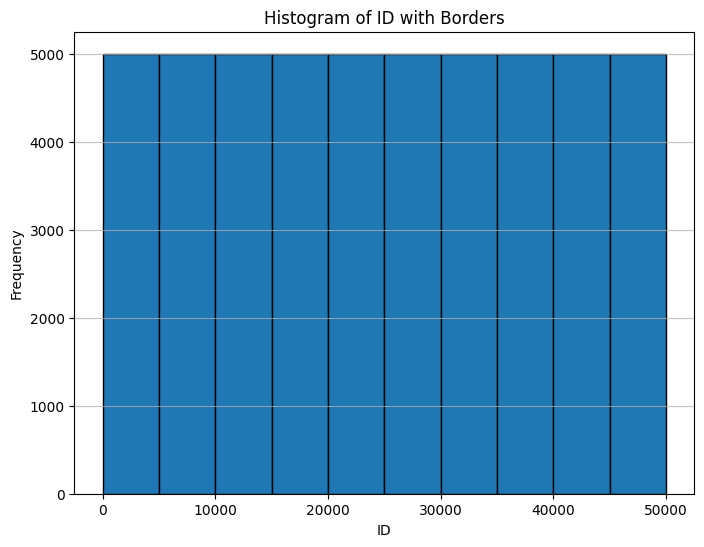

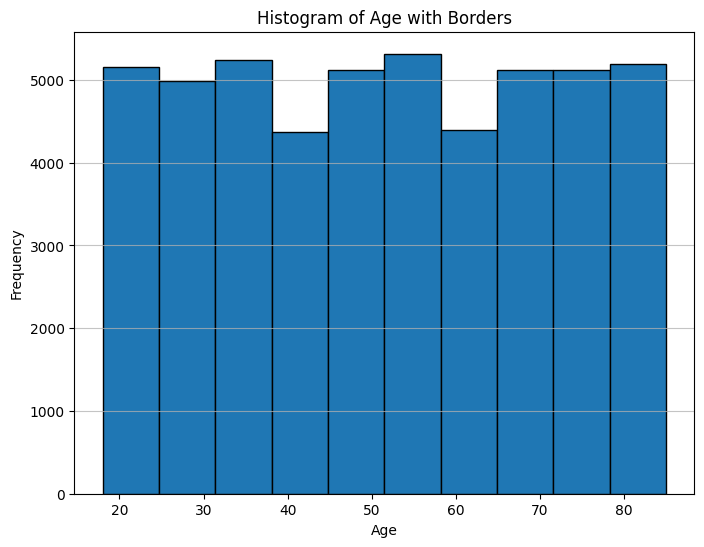

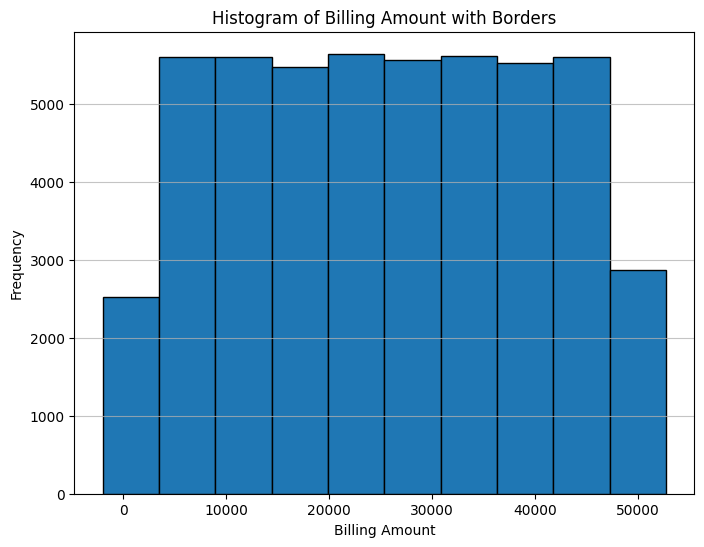

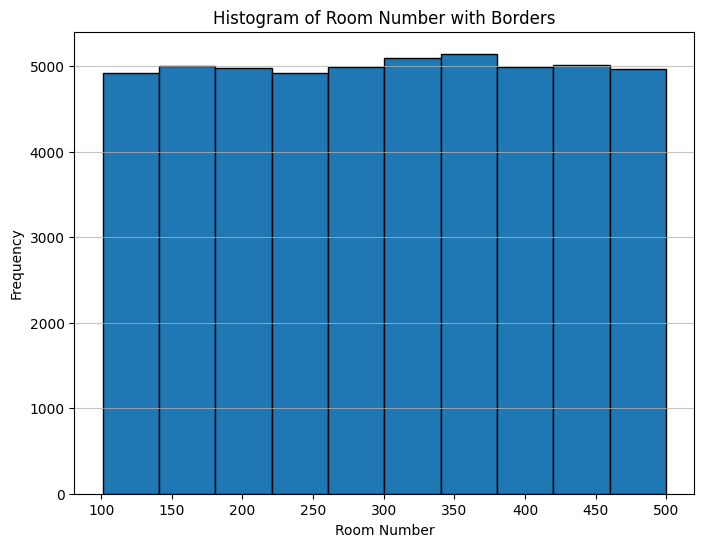

In [ ]:
# prompt: visulise the data using rhistogram with borders

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and numerical_cols are identified

# Iterate through numerical columns and create histograms with borders
for col in numerical_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    plt.hist(df[col], edgecolor='black')  # Add edgecolor for borders
    plt.title(f'Histogram of {col} with Borders')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75) #Optional grid
    plt.show()
